In [1]:
import os 
import sys
import pandas as pd 
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

%run /home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Power/power_band_class.py

os.chdir('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/')
%run load_files.py
%run filter.py
%run exploratory.py
%run constants.py

## Power - Frequency Bands

In [5]:
frequency_names = ['delta', 'theta', 'sigma', 'beta', 'gamma']
frequency_bands = [[1, 5], [5, 11], [11, 16], [16, 30], [30, 48]]

In [101]:
analysis_ls = ['S7068']
for animal in analysis_ls:
    print('loading ' + str(animal))
    animal = str(animal)
    load_files = LoadFiles(directory_path, animal)
    data_loaded = []
    
    # Load data based on the group the animal belongs to
    if animal in SYNGAP_2_ID_ls:
        data_1, data_2, brain_state_1, brain_state_2 = load_files.load_two_analysis_files(start_times_dict=SYNGAP_baseline_start,
                                                                                          end_times_dict=SYNGAP_baseline_end)
        data_loaded.extend([(data_1, brain_state_1), (data_2, brain_state_2)])
    elif animal in SYNGAP_1_ID_ls:
        data_1, brain_state_1 = load_files.load_one_analysis_file(start_times_dict=SYNGAP_baseline_start,
                                                                  end_times_dict=SYNGAP_baseline_end)
        data_loaded.append((data_1, brain_state_1))
    
    print('data loaded')
        
    freq_power = []
    for freq_name, freq_band in zip(frequency_names, frequency_bands):
        for data, brain_state in data_loaded:
            #if you want to calculate power for all brain states (rem, nrem, wake), make all_brain_states = True
            br_idx, br_values = load_files.choose_indices(brain_state, all_brain_states=True)
            noise_filter = NoiseFilter(data, brain_state_file=brain_state, channelvariables=channel_variables,
                                       ch_type='eeg')
            bandpass_filtered_data = noise_filter.filter_data_type()
            power_calc = PowerBands(freq_low=freq_band[0], freq_high=freq_band[1], fs=250.4, nperseg=1252)
            #select channel numbers - can include a for loop here to calculate
            power_array = power_calc.calculate_power_average(bandpass_filtered_data,clean_indices = br_idx,
                                                     br_values = br_values,animal = animal,
                                                     frequency = freq_name, all_channels = False, channel = 2)
            freq_power.append(power_array)

loading S7068
data loaded


In [102]:
freq_concat = pd.concat(freq_power)

In [103]:
freq_concat 

,Power,Channel,Idx,Brainstate,Animal_ID,Frequency
0,35.735638,2,11,0,S7068,delta
1,29.700220,2,28,0,S7068,delta
2,21.803248,2,29,0,S7068,delta
3,29.359234,2,31,0,S7068,delta
4,27.138967,2,34,0,S7068,delta
...,...,...,...,...,...,...
10094,0.923495,2,17264,0,S7068,gamma
10095,1.540547,2,17270,0,S7068,gamma
10096,1.684891,2,17274,0,S7068,gamma
10097,1.617880,2,17276,0,S7068,gamma


## Baseline overall (1 - 48Hz)

In [2]:
frequency_names = ['overall']
frequency_bands = [[1, 48]]

In [3]:
channel_indices = list(range(0,14))
channel_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [28]:
all_animals_ls = []
for animal in analysis_ls:
    print('loading ' + str(animal))
    animal = str(animal)
    load_files = LoadFiles(directory_path, animal)
    data_loaded = []
    
    # Load data based on the group the animal belongs to
    if animal in SYNGAP_2_ID_ls:
        data_1, data_2, brain_state_1, brain_state_2 = load_files.load_two_analysis_files(start_times_dict=SYNGAP_baseline_start,
                                                                                          end_times_dict=SYNGAP_baseline_end)
        data_loaded.extend([(data_1, brain_state_1), (data_2, brain_state_2)])
    elif animal in SYNGAP_1_ID_ls:
        data_1, brain_state_1 = load_files.load_one_analysis_file(start_times_dict=SYNGAP_baseline_start,
                                                                  end_times_dict=SYNGAP_baseline_end)
        data_loaded.append((data_1, brain_state_1))
    
    print('data loaded')
        
    power_ls = []
    for freq_name, freq_band in zip(frequency_names, frequency_bands):
        for data, brain_state in data_loaded:
            #if you want to calculate power for all brain states (rem, nrem, wake), make all_brain_states = True
            br_idx, br_values = load_files.choose_indices(brain_state, all_brain_states=True)
            noise_filter = NoiseFilter(data, brain_state_file=brain_state, channelvariables=channel_variables,
                                       ch_type='eeg')
            bandpass_filtered_data = noise_filter.filter_data_type()
            power_calc = PowerBands(freq_low=freq_band[0], freq_high=freq_band[1], fs=250.4, nperseg=1252)
            #select channel numbers - can include a for loop here to calculate
            for chan in channel_indices:
                power_array, frequency = power_calc.average_psd_overall(data_array = bandpass_filtered_data[chan], clean_indices = br_idx)
                power_chan_df = pd.DataFrame({'Power': power_array, 'Frequency': frequency, 
                                              'Channel': [chan]*len(power_array), 'Animal': [animal]*len(power_array)})
                power_ls.append(power_chan_df)
    
    power_df = pd.concat(power_ls)
    all_animals_ls.append(power_df)

loading S7088
data loaded
loading S7092
data loaded
loading S7086
data loaded
loading S7063
data loaded
loading S7064
data loaded
loading S7069
data loaded
loading S7070
data loaded
loading S7072
data loaded
loading S7086
data loaded
loading S7091
data loaded
loading S7101
data loaded
loading S7094
data loaded
loading S7096
data loaded
loading S7098
data loaded
loading S7068
data loaded
loading S7074
data loaded
loading S7075
data loaded
loading S7071
data loaded
loading S7076
data loaded


In [29]:
plot_data = pd.concat(all_animals_ls)

In [9]:
plot_data.to_csv('/home/melissa/RESULTS/EEGFeatureExtraction/Power/average_power_baseline_all_sleep_animals.csv')

18


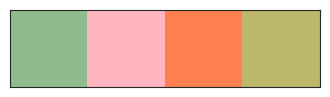

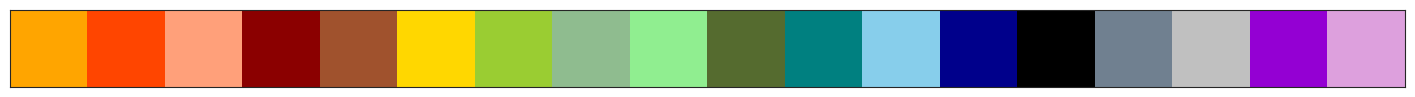

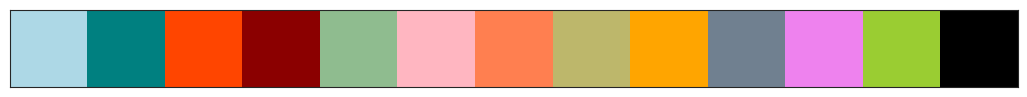

In [13]:
royal = ['darkseagreen', 'lightpink', 'coral', 'darkkhaki']
darjeeling = ['orange', 'lightgreen', 'skyblue', 'plum']
bright = ['lightblue', 'teal', 'orangered', 'darkred']
wt_id_colors = ['orange', 'orangered','lightsalmon','darkred','sienna', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue','black', 'slategrey', 'silver', 'darkviolet', 'plum']
channels = ['lightblue', 'teal', 'orangered', 'darkred', 'darkseagreen', 
                 'lightpink', 'coral', 'darkkhaki', 'orange', 'slategrey', 'violet', 'yellowgreen', 'black']
sns.palplot(royal)
sns.palplot(wt_id_colors)
print(len(wt_id_colors))
sns.palplot(channels)

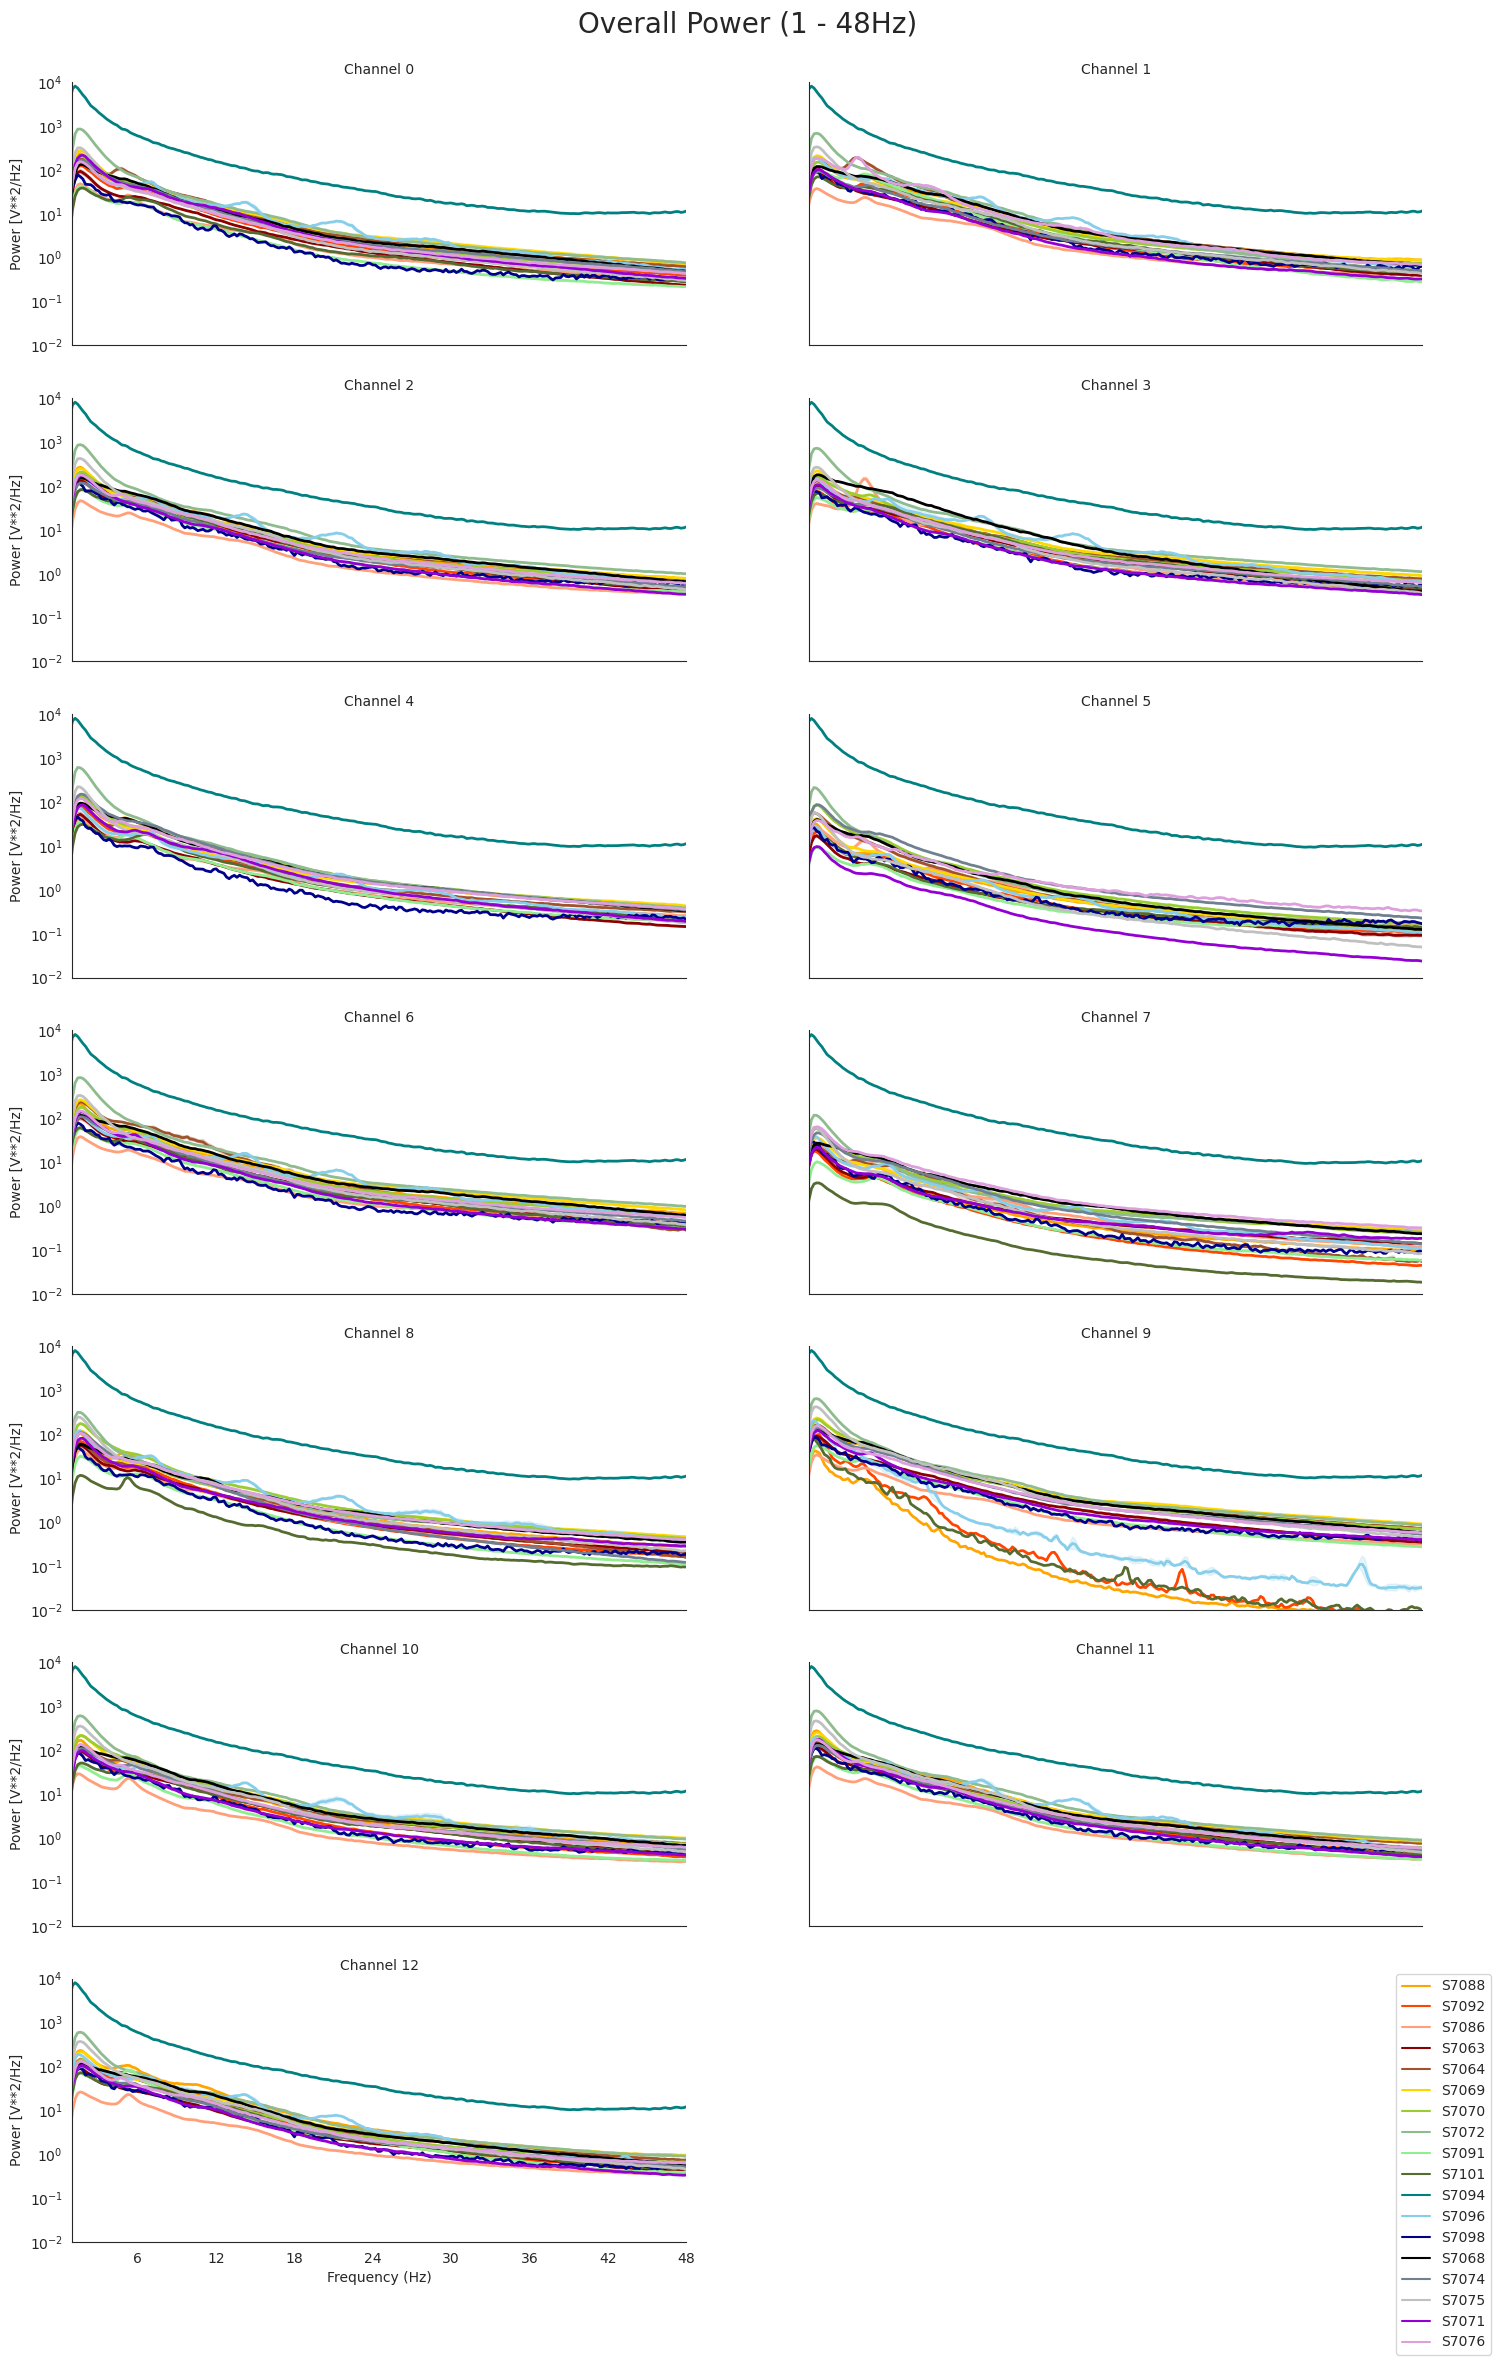

In [26]:


# Set the style
sns.set_style("white")

# Adjust the figure to accommodate the legend subplot
fig, axs = plt.subplots(7, 2, figsize=(15, 24), sharex=True, sharey=True)  # Make the figure slightly taller

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Assuming `plot_data` is your DataFrame and it has columns 'Channel', 'Frequency', 'Power', and 'Animal'
unique_channel_ids = plot_data['Channel'].unique()

for i, channel_id in enumerate(unique_channel_ids[:-1]):  # Leave the last subplot empty for the legend
    # Filter the data for the current channel
    data_filtered = plot_data[plot_data['Channel'] == channel_id]
    
    # Plot on the ith subplot
    ax = sns.lineplot(data=data_filtered, x='Frequency', y='Power', ax=axs[i], 
                      hue='Animal', errorbar=("se"), linewidth=2, palette=wt_id_colors)
    
    # Set log scale for y-axis
    axs[i].set_yscale('log')
    
    # Customize ticks
    tick_values = list(range(0, 54, 6))
    label_list = ['0', '6', '12', '18', '24', '30', '36', '42', '48']
    axs[i].set_xticks(ticks=tick_values)
    axs[i].set_xticklabels(labels=label_list)
    
    # Set limits
    axs[i].set_xlim(1, 48)
    axs[i].set_ylim(10**-2, 10**4)
    
    # Set labels
    axs[i].set_xlabel("Frequency (Hz)", fontsize=10)
    axs[i].set_ylabel(r"Power [V**2/Hz]", fontsize=10)
    
    axs[i].set_title(str('Channel ') + str(i), fontsize = 10)
    
    # Remove the subplot's legend
    axs[i].legend().remove()

# Adjust the overall title position
plt.suptitle('Overall Power (1 - 48Hz)', y=0.98, fontsize=20)  # Move the title up

# Use the last subplot as a legend box
axs[-1].axis('off')  # Make sure there's no axis frame or data

# Create a combined legend for all plots and adjust its position
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1, 0), ncol=1)  # Move the legend box further down

# Remove spines
sns.despine()

# Adjust layout more dynamically to prevent overlap
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)



## ETX overall (1 - 48Hz)